# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import seaborn as sns
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Commented out to prevent rerunning the kernel

# Create weather url

#Reference activity day 2 activity

#Create lists to store values

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0
sets = 1

temp_units = "imperial"
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
weather_query_url = weather_url + "appid=" + weather_api_key + "&units=imperial" + "&q="

print("Beginning Data Retrieval")     
print("-----------------------------")

for city in cities:
    try:
        weather_response = requests.get(weather_query_url + city).json()
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        if record > 49:
            sets = sets + 1
            record = 1
        print(f"Processing Record {record} of set {sets} {city}")
        record = record + 1
        time.sleep(1)
    except KeyError:
        print("City not found. Skipping...")
    

Beginning Data Retrieval
-----------------------------
Processing Record 0 of set 1 lavrentiya
City not found. Skipping...
Processing Record 1 of set 1 nikolskoye
Processing Record 2 of set 1 butaritari
Processing Record 3 of set 1 mahebourg
Processing Record 4 of set 1 bismarck
Processing Record 5 of set 1 mataura
Processing Record 6 of set 1 tazovskiy
Processing Record 7 of set 1 thompson
Processing Record 8 of set 1 ous
Processing Record 9 of set 1 ushuaia
Processing Record 10 of set 1 warmbad
City not found. Skipping...
Processing Record 11 of set 1 vaini
Processing Record 12 of set 1 barrow
Processing Record 13 of set 1 coihaique
Processing Record 14 of set 1 georgetown
Processing Record 15 of set 1 vila velha
Processing Record 16 of set 1 bluff
Processing Record 17 of set 1 atuona
Processing Record 18 of set 1 puerto leguizamo
Processing Record 19 of set 1 vostok
Processing Record 20 of set 1 cabo san lucas
City not found. Skipping...
City not found. Skipping...
Processing Record

Processing Record 45 of set 4 sorland
Processing Record 46 of set 4 lovozero
Processing Record 47 of set 4 kemijarvi
Processing Record 48 of set 4 malindi
Processing Record 49 of set 4 ulu tiram
Processing Record 1 of set 5 dharmanagar
Processing Record 2 of set 5 priargunsk
Processing Record 3 of set 5 tautira
Processing Record 4 of set 5 chifeng
Processing Record 5 of set 5 luoyang
Processing Record 6 of set 5 araouane
Processing Record 7 of set 5 ballina
Processing Record 8 of set 5 pisco
Processing Record 9 of set 5 socorro
Processing Record 10 of set 5 sunrise manor
Processing Record 11 of set 5 samarai
Processing Record 12 of set 5 sungaipenuh
Processing Record 13 of set 5 tasiilaq
Processing Record 14 of set 5 hervey bay
Processing Record 15 of set 5 los llanos de aridane
Processing Record 16 of set 5 channel-port aux basques
Processing Record 17 of set 5 sangar
Processing Record 18 of set 5 gambela
Processing Record 19 of set 5 george town
Processing Record 20 of set 5 manzhoul

City not found. Skipping...
Processing Record 3 of set 9 saint george
Processing Record 4 of set 9 dicabisagan
Processing Record 5 of set 9 bandarbeyla
Processing Record 6 of set 9 sinnamary
City not found. Skipping...
Processing Record 7 of set 9 koslan
Processing Record 8 of set 9 seoul
City not found. Skipping...
Processing Record 9 of set 9 umm lajj
Processing Record 10 of set 9 goderich
Processing Record 11 of set 9 yumen
Processing Record 12 of set 9 macusani
Processing Record 13 of set 9 innisfail
Processing Record 14 of set 9 ponta delgada
Processing Record 15 of set 9 grindavik
Processing Record 16 of set 9 saint-francois
Processing Record 17 of set 9 barcelos
Processing Record 18 of set 9 ayan
Processing Record 19 of set 9 national city
City not found. Skipping...
Processing Record 20 of set 9 sisimiut
Processing Record 21 of set 9 marolambo
Processing Record 22 of set 9 puksoozero
Processing Record 23 of set 9 muli
Processing Record 24 of set 9 mogadishu
Processing Record 25

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
output_path = "../output_data/city_weather.csv"

cities_df = pd.DataFrame({"City": city_name,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Date": date})
#store dataframe as csv

cities_df.to_csv(r'C:\Users\Dan\gitrepo\python-api-challenge\WeatherPy\output_data\city_weather.csv', sep=',', index=False)

#print preview of csv file

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Lavrentiya,65.58,-171.00,39.61,92,100,30.00,1602870659
1,Nikolskoye,59.70,30.79,41.00,65,90,6.71,1602870660
2,Butaritari,3.07,172.79,81.46,75,17,13.60,1602870661
3,Mahébourg,-20.41,57.70,73.40,78,40,3.36,1602870663
4,Bismarck,46.81,-100.78,39.00,51,1,14.99,1602870388


In [7]:
#Create summary of the dataframe

cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.00000,5.530000e+02
mean,21.610995,24.663544,60.450886,70.236890,50.793852,8.25047,1.602871e+09
std,33.852885,89.972106,21.023862,23.367805,38.647152,5.27637,3.396067e+02
min,-54.800000,-175.200000,-2.900000,3.000000,0.000000,0.60000,1.602870e+09
25%,-7.260000,-53.460000,43.140000,56.000000,6.000000,4.25000,1.602871e+09
50%,28.170000,30.790000,64.400000,77.000000,49.000000,7.00000,1.602871e+09
75%,50.200000,105.430000,77.760000,88.000000,90.000000,11.41000,1.602871e+09
max,78.220000,179.320000,105.800000,100.000000,100.000000,35.12000,1.602872e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#No cities with humidity greater then 100--skipping this step

In [ ]:
#  Get the indices of cities that have humidity over 100%.

#No cities with humidity greater then 100--skipping this step

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#No cities with humidity greater then 100--skipping this step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

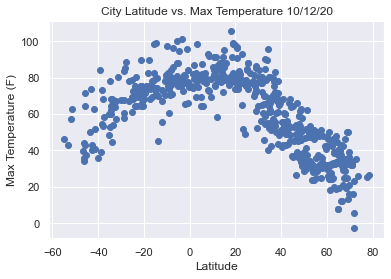

In [12]:
# Create a Scatter Plot for Latitute vs. max temp

sns.set()

latitude_values = cities_df['Lat']
maxtemp_values = cities_df["Max Temp"]  
plt.scatter(latitude_values, maxtemp_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature 10/12/20')
plt.savefig('figures\lat_v_temp.png')
plt.show()

## Latitude vs. Humidity Plot

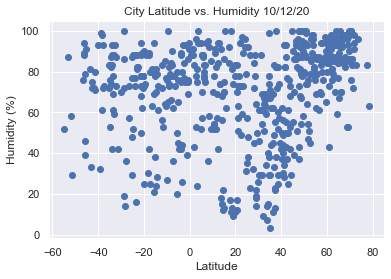

In [13]:
humidity_values = cities_df["Humidity"]
plt.scatter(latitude_values, humidity_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity 10/12/20')
plt.savefig('figures\lat_v_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

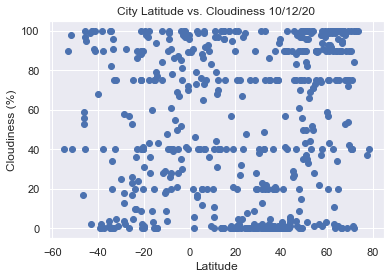

In [14]:
cloud_values = cities_df["Cloudiness"]
plt.scatter(latitude_values, cloud_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness 10/12/20')
plt.savefig('figures\lat_v_cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

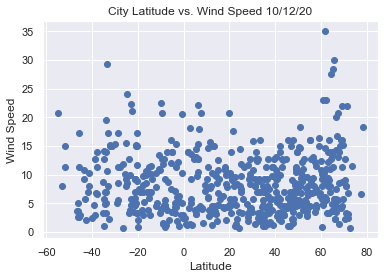

In [15]:
wind_values = cities_df["Wind Speed"]
plt.scatter(latitude_values, wind_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed 10/12/20')
plt.savefig('figures\lat_v_wind.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7437019471917129


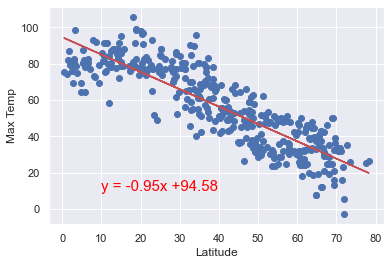

In [27]:
nor_lat_values = cities_df['Lat'].loc[(cities_df['Lat'] > 0)]
nor_temp_values = cities_df['Max Temp'].loc[(cities_df['Lat'] > 0)]

#Create regression line for graph

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nor_lat_values, nor_temp_values)

regress_values = nor_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(nor_lat_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

#Create scatterplot for northern hemisphere

plt.scatter(nor_lat_values, nor_temp_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('north_lat_v_temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.47133733008193157


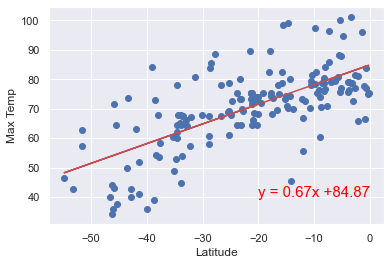

In [25]:
so_lat_values = cities_df['Lat'].loc[(cities_df['Lat'] < 0)]
so_temp_values = cities_df['Max Temp'].loc[(cities_df['Lat'] < 0)]

#Create regression line for graph

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(so_lat_values, so_temp_values)

so_regress_values = so_lat_values * slope + intercept
so_line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(so_lat_values,so_regress_values,"r-")
plt.annotate(so_line_eq,(-20,40),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.scatter(so_lat_values, so_temp_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('figures\so_lat_v_temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11164810502933345


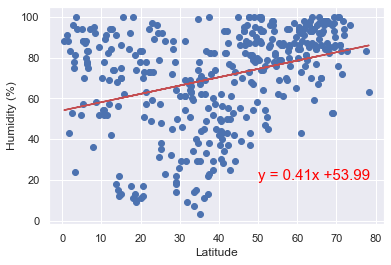

In [30]:
nor_hum_values = cities_df['Humidity'].loc[(cities_df['Lat'] > 0)]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nor_lat_values, nor_hum_values)

norhum_regress_values = nor_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(nor_lat_values,norhum_regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

#Create scatterplot for northern hemisphere

plt.scatter(nor_lat_values, nor_hum_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('north_lat_v_hum.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0008541040705468126


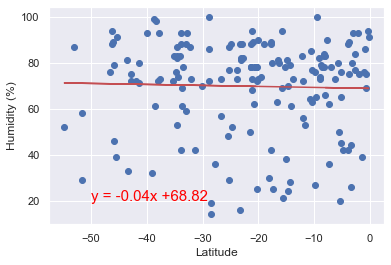

In [32]:
so_hum_values = cities_df['Humidity'].loc[(cities_df['Lat'] < 0)]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(so_lat_values, so_hum_values)

sohum_regress_values = so_lat_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(so_lat_values,sohum_regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

#Create scatterplot for northern hemisphere

plt.scatter(so_lat_values, so_hum_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('figures\so_lat_v_hum.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
nor_cloud_values = 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression